---
title: "Lab 1: Bias-Var Tradeoff & Poly Regression"
author: "Parijat Dube"
date: "2/4/2023"
output: pdf_document
---

# Lab 1: Bias-Var Tradeoff & Poly Regression
### Author: Parijat Dube
### Date: 2/4/2023


Please submit your finished lab on Canvas as a knitted pdf or html document. The lab is due on Feb 18, 2024.

# Section I: Goal

The learning objective of this lab is to investigate the important bias-variance tradeoff in a linear regression setting under squared loss. This will be accomplished by running a small simulation study. The required tasks are stated in Section V.

# Section II: Bias-Variance Tradeoff

Let $(x_1,y_1),\ldots,(x_n,y_n)$ be the training data and denote the trained model by $\hat{f}(x)$. Consider a single test case $(x_0,y_0)$, which was not used to train $\hat{f}(x)$.  The mean square error at test case $(x_0,y_0)$ can be decomposed into three parts; i) variance of $\hat{f}(x_0)$, ii) squared bias of $\hat{f}(x_0)$, and iii) irreducible error variance $\text{Var}(\epsilon_0)$. The decomposition is stated below:
\begin{align*}
MSE(x_0)&=MSE\hat{f}(x_0)\\
&=E[(y_0-\hat{f}(x_0))^2]\\
&=\text{Var}(\hat{f}(x_0))+(E\hat{f}(x_0)-f(x_0))^2+\text{Var}(\epsilon_0)
\end{align*}

# Section III: True Model and Simulated Data

Assume $X$ is not random taking on values in the interval $[4,20]$ and the true relationship between fixed $X$ and response $Y$ is:
\begin{align*}
y=f(x)+\epsilon =(x-5)(x-12)+\epsilon,
\end{align*}
where $\epsilon$ is normally distributed with $E(\epsilon)=0$ and $\text{Var}(\epsilon_0)=20^2$. Note that for test case $(x_0,y_0)$, the statistical relation between $x_0$ and $y_0$ is
\begin{align*}
y_0=f(x_0)+\epsilon.
\end{align*}


The function **true.f()** defined in the code chunk below defines $f(x)$ and is evaluated at $x=16$.  


In [1]:
true.f <- function(x) {
  f.out <- (x-5)*(x-12)
  return(f.out)
}
true.f(16)

[1] 44


The function **sim.training()** simulates a training dataset of size $n=20$ based on our regression model. The training feature $x$ is hard-coded and takes on equally spaced values over the interval $[4,20]$. The only input of **sim.training()** is the feature test case $x_0$.  The function returns the simulated dataset and the response for test case(s) $x_0$.   


In [3]:
sim.training <- function(x.test=c(16)
                         ) {
  # Hard-coded sample size and standard deviation
  n <- 20
  sd.error <- 20

  # Training x vector
  x <- seq(4,20,length=n)

  # Simulate training Y based on f(x) and normal error
  y <- true.f(x)+rnorm(n,sd=sd.error)

  # Simulate test case
  y.test <- true.f(x.test)+rnorm(length(x.test),sd=sd.error)

  # Return a list of two entries:
    # 1) the dataframe data.train
    # 2) test respone vector y_0
  return(list(data.train=data.frame(x=x,y=y),
              y.test=y.test))
}


To illustrate **sim.training()**, we simulate a  training dataset using **set.seed(1)**.  Two test cases are chosen at $x_0=10,16$. The following code chunk also plots the simulated data with the true relationship $f(x)$ and chosen test cases.  Make sure to run the entire code chunk at once.  


,x,y
,<dbl>,<dbl>
1,4.000000,-4.529076
2,4.842105,4.803060
3,5.684211,-21.033902
4,6.526316,23.551045


[1]  8.379547 59.642726

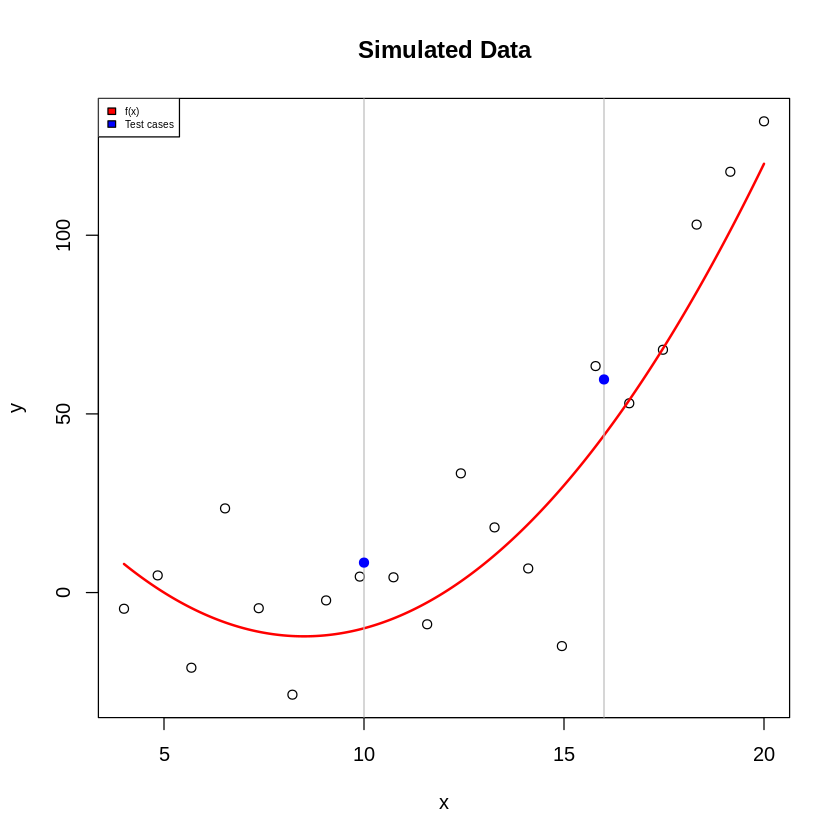

In [4]:
# Simulate data
set.seed(1)
x.test <- c(10,16)
sim.data.train <- sim.training(x.test=x.test)
head(sim.data.train$data.train,4)
sim.data.train$y.test

# Plot simulated data
x.plot <- seq(4,20,by=.01)
x <- sim.data.train$data.train$x
y <- sim.data.train$data.train$y
plot(x,y,main="Simulated Data")

# Plot f(x)
lines(x.plot,true.f(x.plot),lwd=2,col="red")

# Plot test cases
y.test <- sim.data.train$y.test
abline(v=x.test,col="grey")
points(x.test,y.test,pch=20,cex=1.5,col="blue")

# Legend
legend("topleft",legend=c("f(x)","Test cases"),fill=c("red","blue"),cex=.5)



# Section IV: Polynomial Regression and Tuning Parameter

Recall form lecture, the number of features ($p$) in a multiple linear regression model is a tuning parameter.  This naturally extends to polynomial regression as stated in the below model:
\[
y=\beta_0+\beta_1x+\beta_2x^2+\cdots+\beta_px^p+\epsilon
\]
In this case, the tuning parameter is the degree of our polynomial $p$.  High degree polynomials can approximate any continuous differentiable function. However, too high of a degree can lead to overfitting and poor generalization.

To fit this model, use the the **lm()** function in conjunction with **poly()**.  Technically we will utilize orthogonal polynomials which is not exactly the same as the polynomial regression model above. The function **predict.test.case()** defined in the code chunk below estimates $y_0$ based on the $p^{th}$ degree trained polynomial, i.e., $\hat{f}_p(x_0)$. The inputs are; i) the degree of the polynomial **degree**, ii) the training data **data**, and iii) a vector test cases **x.test**.


In [5]:
predict.test.case <- function(degree,
                              data,
                              x.test) {

  # Train model
  model <- lm(y~poly(x,degree=degree),data=data)
  # Predict test cases
  y.test.hat <- predict(model,newdata=data.frame(x=x.test))
  # Return y test case
  return(y.test.hat)
}


To illustrate **predict.test.case()**, consider estimating $y_0$ for inputs $x_0=10,16$, where the polynomial is trained using our simulated data **sim.data.train**. Notice that **predict.test.case()** can also be used for plotting.


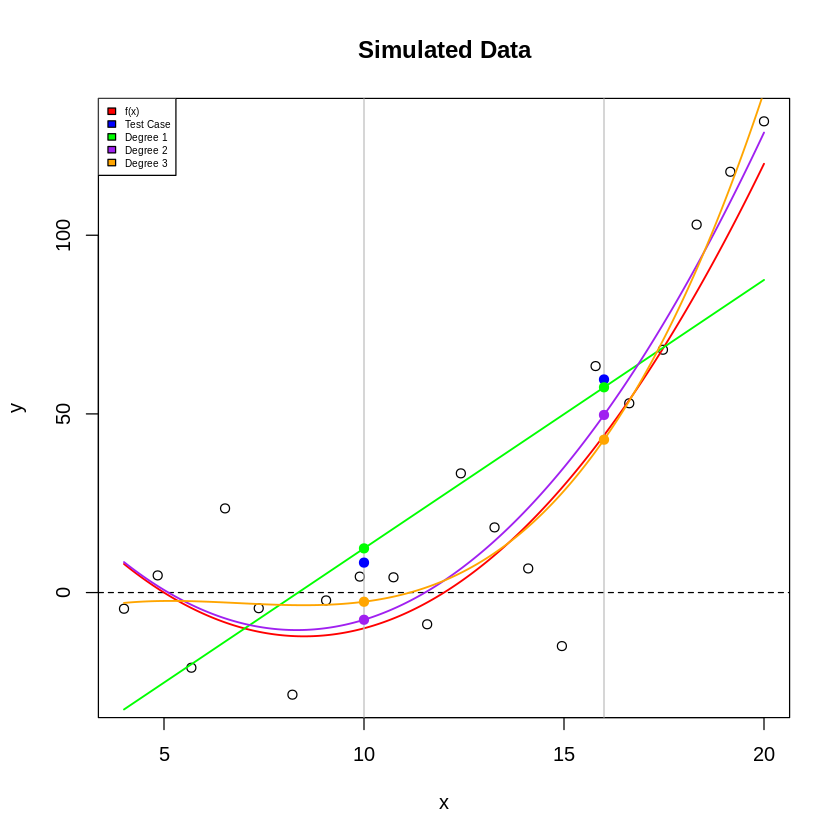

In [6]:
x.plot <- seq(4,20,by=.01)
x.test <- c(10,16)
# Predict for degree=1
y.pred.1 <- predict.test.case(degree=1,
                              data=sim.data.train$data.train,
                              x.test=x.test)
y.plot.1 <- predict.test.case(degree=1,
                              data=sim.data.train$data.train,
                              x.test=x.plot)
# Predict for degree=2
y.pred.2 <- predict.test.case(degree=2,
                              data=sim.data.train$data.train,
                              x.test=x.test)
y.plot.2 <- predict.test.case(degree=2,
                              data=sim.data.train$data.train,
                              x.test=x.plot)
# Predict for degree=3
y.pred.3 <- predict.test.case(degree=3,
                              data=sim.data.train$data.train,
                              x.test=x.test)
y.plot.3 <- predict.test.case(degree=3,
                              data=sim.data.train$data.train,
                              x.test=x.plot)

# Plot simulated data
x <- sim.data.train$data.train$x
y <- sim.data.train$data.train$y
plot(x,y,main="Simulated Data")
abline(h=0,lty=2)

# Plot f(x)
lines(x.plot,true.f(x.plot),lwd=1.5,col="red")

# Plot the estimated curves
lines(x.plot,y.plot.1,lwd=1.5,col="green")
lines(x.plot,y.plot.2,lwd=1.5,col="purple")
lines(x.plot,y.plot.3,lwd=1.5,col="orange")

# Plot test cases
y.test <- sim.data.train$y.test
abline(v=x.test,col="grey")
points(x.test,y.test,pch=20,cex=1.5,col="blue")

# Plot estimated test cases
points(x.test,y.pred.1,pch=20,cex=1.5,col="green")
points(x.test,y.pred.2,pch=20,cex=1.5,col="purple")
points(x.test,y.pred.3,pch=20,cex=1.5,col="orange")

# Legend
legend("topleft",
       legend=c("f(x)","Test Case","Degree 1","Degree 2","Degree 3"),
       fill=c("red","blue","green","purple","orange"),
       cex=.5)


The above code is clunky and can easily be refined. To clean up this process, the function **poly.predict()** defined below trains several polynomial models based on a vector of degrees and outputs the predicted response simultaneously. This function vectorizes **predict.test.case()**. The inputs are; i) a vector of degrees **degree.vec**, ii) a vector of $x$ test points **x.test**, iii) a training dataset **data**. The output of **poly.predict()** is a matrix where the row corresponds to the respective test cases. To see this function in action, the below code also evaluates $\hat{f}_p(x_0)$ at inputs $x_0=10,16$ using polynomial degrees 1,2,3,4.


In [7]:
poly.predict <- function(degree.vec,
                          data,
                          x.test) {

  # Vectorize predict.test.case()
  pred <- sapply(degree.vec,
                 predict.test.case,
                 data=data,
                 x.test=x.test)

  # Name rows and columns
  rownames(pred)  <- paste("TestCase",1:length(x.test),sep="")
  colnames(pred)  <- paste("D",degree.vec,sep="")
  # Return
  return(pred)
}

# Test function poly.predict()
x.test <- c(10,16)
poly.predict(degree.vec=1:4,
             data=sim.data.train$data.train,
             x.test=x.test)

,D1,D2,D3,D4
TestCase1,12.36425,-7.61066,-2.568078,-2.819858
TestCase2,57.43977,49.70754,42.782198,43.149616



# Section V: Student Tasks: (1) - (3)

Students will solve three major tasks in this lab.  The first task is described below.

## Task 1

Simulate **R=1000** training datasets and for each iteration (or each simulated dataset), store the predicted test cases corresponding to inputs $x_0=10,16$.  For each simulated dataset, you must predict $y_0$ using polynomial regression having degrees $p=1,2,3,4,5$. You can easily solve this problem using a loop and calling on the two functions **sim.training()** and **poly.predict()**.

Your final result will be three matrices. The first matrix **mat.pred.1** is the collection of predicted test cases for each degree corresponding to input $x_0=10$.  Similarly, the matrix **mat.pred.2** corresponds to $x_0=16$. The first two matrices are dimension $(5 \times 1000)$.  The third matrix **y.test.mat** is the collection of all test cases $y_0$ for each simulated dataset. This matrix is dimension $(2 \times 1000)$. After completing this problem, display the first three columns of each matrix.



In [ ]:
# Solution goes here -----------



## Task 2

The second task is to estimate three different quantities based on the simulation from Task (1). For each polynomial degree ($p=1,2,3,4,5$), use the matrices **mat.pred.1**, **mat.pred.2** and **y.test.mat** to estimate:

1. The mean square error $MSE(x_0)$ \\
2. The variance $\text{Var}(\hat{f}(x_0))$ \\
3. The squared bias $(E\hat{f}(x_0)-f(x_0))^2$ \\

After solving this problem, display the 6 vectors of interest.

**Notes**:

1) When estimating the squared bias, students will use **y.test.mat** to estimate $E\hat{f}(x_0)$ but will also call the function  **true.f()**  for computing $f(x_0)$. Obviously in practice we never know the true relation $f(x)$.

2) To estimate $MSE(x_0)$, you can slightly modify your loop from Task (1) or write a new program that computes $(y_0-\hat{f}(x_0))^2$ for all $R=1000$ iterations. Then take the average of the resulting vectors.  



In [ ]:
# Solution goes here -----------


## Task 3

The third task requires students to construct a plots showing $MSE(x_0)$, $\text{Var}(\hat{f}(x_0))$ and $\text{Bias}^2(\hat{f}(x_0))$ as a function of the polynomial degree. There should be two graphics corresponding to the two test cases $x_0=10$ and $x_0=16$.



In [ ]:
# Solution goes here -----------